# Project 2 - Ames Housing Data and Kaggle Challenge

**Overview:**

1) Project Objectives:
- Generate a regression model to predict housing prices; specifically for the kaggle challenge (& as a benchmark of the effectiveness of the model) to achieve the lowest RMSE

2) Exploratory data analysis
- ensure that data points were cast in the correct datatypes 
- identified all null values in the dataset and carried out further inspection
- plotted heatmap, pairplot, histogram and boxplots to understand the general distribution of data and presence of outliers 

3) Clean up dataset
- did not remove any null values at the initial stage as it was too numerous  
- renamed column names to standardize naming  
- split data set into numerical and categorical variables 

4) Transform variables
- split categorical variables into nominal, ordinal and binary  
- performed mean encoding on nominal variables, ordinal encoding on oridnal variables and hot-encoding on binary variables

5) Feature Selection 
- ran regressions (for numerical variables) and selected the most highly correlated variables
- ran regressions separately for ordinal and nominal vars and selected the most highly correlated ones 
- selected the top numerical, ordinal, nominal and all binary vars as the final feature set for the model

6) Train/test/split 
- used sklearn's tts to split, train and test, with 80% of the dataset used for training and the rest for testing

7) Scale variables
- used sklearn's standard Scaler for scaling - fitted using the training set. 

8) Evaluate, test and fit model :
- K-fold cross valuation using 10 folds. K-fold cross R^2 scores were pretty consistent  
- mean cross valuation R^2 score was also approx the same as the model R^2 score when fitted on a lin reg model
- fitted using a OLS stat model to generate other stats too 


9) Regularize & tuned hyperparameters:
- Ridge regression
- Lasso regression
- Hyperparameter tuning using grid search 

9) Final checks & final model selection:
- compared (adjusted) R^2 and RMSE scores different mdoels and selected the best (adjusted) R^2 score 

10) Generate predictions on general (test) dataset: 
- Performed the same set of transformations on the test set predictor variables as we did on the training set predictor variables

Group 3: Fiona, Kelvyn, Samuel 

**Importing Libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


**Loading the Data**

In [4]:
#ames_train contains all of the training data for your model.

#ames_test target variable (SalePrice) is removed from the test set 
#this data contains the test data for your model. You will feed this data into your regression model to make predictions.

ames_train = "./datasets/train.csv"
ames_test = "./datasets/test.csv"

ames_train = pd.read_csv(ames_train)
ames_test = pd.read_csv(ames_test)

#note to self: test set does not contain true target variable values so we can't score it 
#just work with the training data set to train and test 

**Data cleaning: Initial check**

Check the following in the cells below:
1. Do we have any null values?
2. Are any numerical columns being read in as `object`?

In [8]:
ames_train.shape

(2051, 81)

In [9]:
ames_test.shape #note that the test set contains one less column: the Sales price target variable 

(879, 80)

In [11]:
ames_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [435]:
ames_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
id                 2051 non-null int64
pid                2051 non-null int64
ms_subclass        2051 non-null int64
ms_zoning          2051 non-null object
lot_frontage       1721 non-null float64
lot_area           2051 non-null int64
street             2051 non-null object
alley              140 non-null object
lot_shape          2051 non-null object
land_contour       2051 non-null object
utilities          2051 non-null object
lot_config         2051 non-null object
land_slope         2051 non-null object
neighborhood       2051 non-null object
condition_1        2051 non-null object
condition_2        2051 non-null object
bldg_type          2051 non-null object
house_style        2051 non-null object
overall_qual       2051 non-null int64
overall_cond       2051 non-null int64
year_built         2051 non-null int64
year_remod/add     2051 non-null int64
roof_style         20

- There are quite a few categorical variables with high number of NaN values that require further inspection.
- Almost half of the 81 variables are categorical variables.  
- Cross referenced data types with the data dictionary on kaggle - data types seem consistent with data input (i.e. numerical types are int64 or float64 and categorical types are objects
- I am creating a dictionary below because this command does not return the full list of null values 

In [140]:
null_values = ames_train.isnull().sum()

In [39]:
null_values.index

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [40]:
names = ['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC',
       'Fence', 'Misc Feature', 'Misc Val', 'Mo Sold', 'Yr Sold', 'Sale Type',
       'SalePrice']

In [41]:
values = []
for i in null_values:
    values.append(i)

null_values = zip(names,values)

There are actually quite a lot of null values:
- 'Pool QC': 2042
- 'Fence': 1651
- 'Misc Feature': 1986
- 'Fireplace Qu': 1000
- 'Alley': 1911
- 'Lot Frontage': 330

In [42]:
dict(null_values)
#is there a faster way to view all the null values by thier column names? (df.isnull().sum() doesn't print out
#the entire list)

{'Id': 0,
 'PID': 0,
 'MS SubClass': 0,
 'MS Zoning': 0,
 'Lot Frontage': 330,
 'Lot Area': 0,
 'Street': 0,
 'Alley': 1911,
 'Lot Shape': 0,
 'Land Contour': 0,
 'Utilities': 0,
 'Lot Config': 0,
 'Land Slope': 0,
 'Neighborhood': 0,
 'Condition 1': 0,
 'Condition 2': 0,
 'Bldg Type': 0,
 'House Style': 0,
 'Overall Qual': 0,
 'Overall Cond': 0,
 'Year Built': 0,
 'Year Remod/Add': 0,
 'Roof Style': 0,
 'Roof Matl': 0,
 'Exterior 1st': 0,
 'Exterior 2nd': 0,
 'Mas Vnr Type': 22,
 'Mas Vnr Area': 22,
 'Exter Qual': 0,
 'Exter Cond': 0,
 'Foundation': 0,
 'Bsmt Qual': 55,
 'Bsmt Cond': 55,
 'Bsmt Exposure': 58,
 'BsmtFin Type 1': 55,
 'BsmtFin SF 1': 1,
 'BsmtFin Type 2': 56,
 'BsmtFin SF 2': 1,
 'Bsmt Unf SF': 1,
 'Total Bsmt SF': 1,
 'Heating': 0,
 'Heating QC': 0,
 'Central Air': 0,
 'Electrical': 0,
 '1st Flr SF': 0,
 '2nd Flr SF': 0,
 'Low Qual Fin SF': 0,
 'Gr Liv Area': 0,
 'Bsmt Full Bath': 2,
 'Bsmt Half Bath': 2,
 'Full Bath': 0,
 'Half Bath': 0,
 'Bedroom AbvGr': 0,
 'Kitchen

**Renaming columns for consistency and easier retrieval**

In [43]:
ames_train.columns = [x.lower().replace(' ','_') for x in ames_train.columns]

**Trying to understand columns with high NA counts better**

In [49]:
#there are actually quite a lot of null values esp. 'Pool QC': 2042, 'Fence': 1651, 'Misc Feature': 1986,
# 'Fireplace Qu': 1000, 'Alley': 1911, 'Lot Frontage': 330,
ames_train['pool_qc'].unique()

array([nan, 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [50]:
ames_train['pool_qc'].value_counts() 
# looks like there are only 9 houses that actually has a pool to be graded 
# NA represents No Pool so it seems like alot of these houses have no pools 
# might be better to just dummy variable 0 for no pool and 1 for pool regardless of pool grade 

Gd    4
TA    2
Fa    2
Ex    1
Name: pool_qc, dtype: int64

In [52]:
ames_train['fence'].unique()

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [53]:
ames_train['fence'].value_counts() 

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: fence, dtype: int64

In [54]:
ames_train['misc_feature'].unique()

array([nan, 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

In [55]:
ames_train['misc_feature'].value_counts() 

Shed    56
Gar2     4
Othr     3
TenC     1
Elev     1
Name: misc_feature, dtype: int64

In [59]:
ames_train['fireplace_qu'].unique()

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [60]:
ames_train['fireplace_qu'].value_counts() 

Gd    523
TA    407
Fa     59
Ex     31
Po     31
Name: fireplace_qu, dtype: int64

In [61]:
ames_train['alley'].unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

In [62]:
ames_train['alley'].value_counts() 

Grvl    85
Pave    55
Name: alley, dtype: int64

In [63]:
ames_train['lot_frontage'].unique()

array([ nan,  43.,  68.,  73.,  82., 137.,  35.,  70.,  21.,  64., 120.,
        24.,  74.,  93.,  34.,  80.,  71.,  72., 109.,  40., 103., 100.,
        92.,  65.,  75.,  60.,  30.,  79.,  41., 105., 107.,  81.,  36.,
        63.,  32.,  94.,  44.,  50.,  48.,  67.,  88.,  83.,  53.,  58.,
        57.,  52.,  87., 134.,  56.,  54., 140.,  78.,  85.,  90.,  96.,
        62.,  49.,  59., 155.,  91.,  61.,  86., 128.,  77.,  42.,  89.,
        51.,  69.,  55., 112.,  76., 125.,  98., 113., 102.,  22., 122.,
        84., 119., 118.,  66.,  95., 108., 195., 106.,  39., 110., 130.,
        97.,  45.,  37., 123.,  38., 129., 115.,  47., 114., 104.,  46.,
       121., 124., 313., 141., 101.,  99., 160., 174.,  26., 144., 138.,
       111.,  25.,  33., 200., 150., 117., 153., 116., 135.])

In [64]:
ames_train['lot_frontage'].value_counts() 

60.0     179
70.0      96
80.0      94
50.0      90
65.0      71
        ... 
22.0       1
155.0      1
153.0      1
119.0      1
135.0      1
Name: lot_frontage, Length: 118, dtype: int64

Seems like all null values are Nan or Null meaning that a majority of these houses surveyed simply do not have any of those features. No problematic terms like NA or 0 or empty values. I will probably not use these variables as individual predictor variables for now in constructing my model as it probably won't be a strong predictor given that there are so many non-values. Could potentially think of using them as interaction or dummy variables (e.g. big house + swimming pool) 

However i will not drop the entire row values as they would remove too significant a chunk of data from the training dataset. Neither will i drop these specific columns because as mentioned, they could be useful for studying specific categorical or interactive predictions.

Additionally, pool_qc, fireplace_qu and fence have ordinal variables so we could potentially map them against an ordered list of increasing magnitudes 

In [67]:
ames_train.shape

(2051, 81)

**Subsetting the data (initial survey)**

Selecting a subset of data based on an initial survey of all the variables in the given ames_train dataset based on variables which i think are more relevant for analysis (based on eyeballing/intuition). 

In [84]:
#created a subset dataset of 14 variables: 8 categorical and 6 continuous (inclusive of target variable sale px)
at_trunc_col = ['saleprice','lot_area','lot_shape',  'utilities','condition_1','bldg_type', 'overall_qual',
       'year_built', 'exter_cond', 'foundation','heating', 'mo_sold', 'yr_sold', 'sale_type']

#cat vars = ['lot_shape', 'utilities','condition_1','bldg_type','exter_cond','foundation','heating', 'sale_type']
#continuous var = ['saleprice',lot_area','overall_qual','year_built', 'mo_sold', 'yr_sold']
#y = 'saleprice'

In [85]:
at_trunc = ames_train[at_trunc_col]
at_trunc.head()

,saleprice,lot_area,lot_shape,utilities,condition_1,bldg_type,overall_qual,year_built,exter_cond,foundation,heating,mo_sold,yr_sold,sale_type
0,130500,13517,IR1,AllPub,RRAe,1Fam,6,1976,TA,CBlock,GasA,3,2010,WD
1,220000,11492,IR1,AllPub,Norm,1Fam,7,1996,TA,PConc,GasA,4,2009,WD
2,109000,7922,Reg,AllPub,Norm,1Fam,5,1953,Gd,CBlock,GasA,1,2010,WD
3,174000,9802,Reg,AllPub,Norm,1Fam,5,2006,TA,PConc,GasA,4,2010,WD
4,138500,14235,IR1,AllPub,Norm,1Fam,6,1900,TA,PConc,GasA,3,2010,WD


**Plotting a heatmap of my truncated dataset**

In [86]:
at_trunc_reg = at_trunc.corr()
at_trunc_reg

,saleprice,lot_area,overall_qual,year_built,mo_sold,yr_sold
saleprice,1.000000,0.296566,0.800207,0.571849,0.032735,-0.015203
lot_area,0.296566,1.000000,0.105824,0.036002,0.003197,-0.029454
overall_qual,0.800207,0.105824,1.000000,0.602964,0.019242,-0.011578
year_built,0.571849,0.036002,0.602964,1.000000,-0.007083,-0.003559
mo_sold,0.032735,0.003197,0.019242,-0.007083,1.000000,-0.147494
yr_sold,-0.015203,-0.029454,-0.011578,-0.003559,-0.147494,1.000000


**Note to self: heat map currently only shows correlations between continuous variables**

overall_quality and year_built show the strongest positive correlations with sale price, as expected. lot_area surprisingly doesn't show a very high coefficient. 

Time of sale (i.e. month/year sold) also does not return any strong coefficient indicating that there is no detected seasonality of sales 

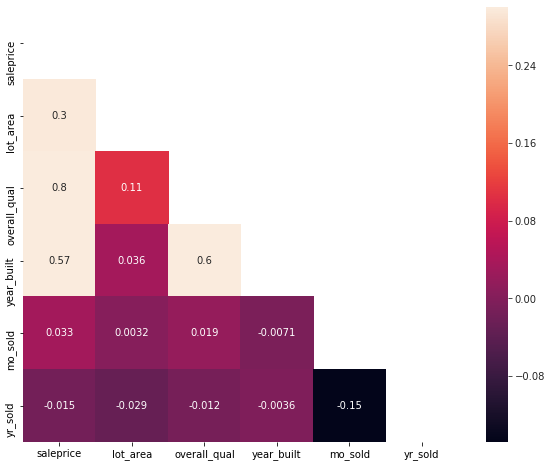

In [103]:
import seaborn as sns 

plt.subplots(figsize=(10,8))

mask = np.zeros_like(at_trunc_reg)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(at_trunc_reg, mask=mask, vmax=.3, square=True, annot=True)
    bottom, top = ax.get_ylim() #add these code to prevent the heatmap from getting cut off
    ax.set_ylim(bottom+0.5, top-0.5)

**Plotting a pairplot on the truncated dataset**

In [88]:
x = ['lot_area','overall_qual','year_built', 'mo_sold', 'yr_sold']
y = ['saleprice']

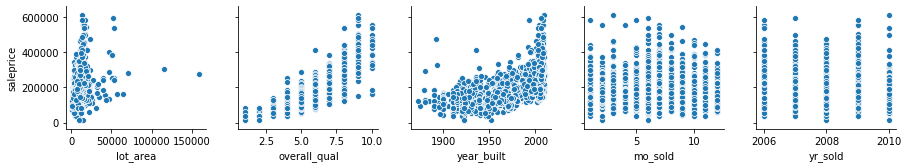

In [89]:
sns.pairplot(ames_train, x_vars = x, y_vars = y);

**Creating Histograms of all numerical columns**

A majority of the numerical variables are not normally distributed with the exception of mo_sold and maybe overall_qual. Most of them are right skewed.  

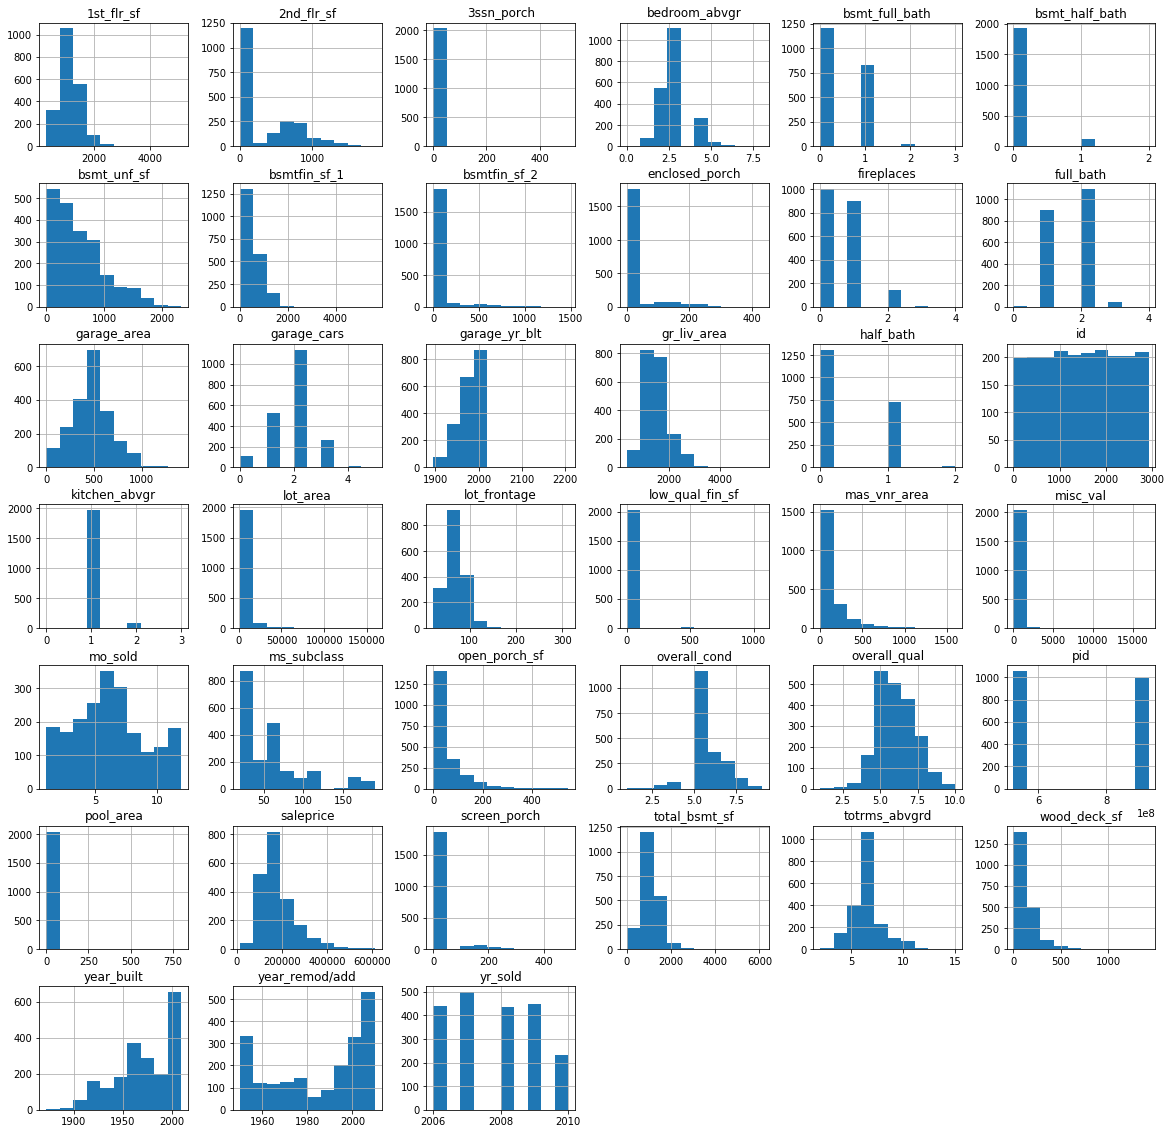

In [141]:
ames_train.hist(figsize=(20,20));
#to consider how we have be transforming these distributions

**Selecting for all numerical columns in the ames_train dataset**

In [100]:
ames_allnum = ames_train.select_dtypes(include=['float64','int64'])

In [105]:
ames_allnum.shape
#there are 39 numerical columns 

(2051, 39)

In [102]:
ames_allnum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 39 columns):
id                 2051 non-null int64
pid                2051 non-null int64
ms_subclass        2051 non-null int64
lot_frontage       1721 non-null float64
lot_area           2051 non-null int64
overall_qual       2051 non-null int64
overall_cond       2051 non-null int64
year_built         2051 non-null int64
year_remod/add     2051 non-null int64
mas_vnr_area       2029 non-null float64
bsmtfin_sf_1       2050 non-null float64
bsmtfin_sf_2       2050 non-null float64
bsmt_unf_sf        2050 non-null float64
total_bsmt_sf      2050 non-null float64
1st_flr_sf         2051 non-null int64
2nd_flr_sf         2051 non-null int64
low_qual_fin_sf    2051 non-null int64
gr_liv_area        2051 non-null int64
bsmt_full_bath     2049 non-null float64
bsmt_half_bath     2049 non-null float64
full_bath          2051 non-null int64
half_bath          2051 non-null int64
bedroom_abvgr      

**Going to run reg and plot boxplots and pairplots for all num columns as well to get a better understanding of the variables**

I am just going to select the top few correlated values (>0.55) against the target variable saleprice isntead of plotting all the variables in a heatmap because there are too many variables for the diagram to be meaningfully interpreted. 

In [107]:
at_allnum_reg = ames_allnum.corr()
at_allnum_reg['saleprice'].sort_values()
#since we are most interested in looking at how the variou independent num vars interact with our target var salesprice

pid               -0.255052
enclosed_porch    -0.135656
kitchen_abvgr     -0.125444
overall_cond      -0.097019
ms_subclass       -0.087335
id                -0.051398
bsmt_half_bath    -0.045328
low_qual_fin_sf   -0.041594
yr_sold           -0.015203
misc_val          -0.007375
bsmtfin_sf_2       0.016255
pool_area          0.023106
mo_sold            0.032735
3ssn_porch         0.048732
screen_porch       0.134581
bedroom_abvgr      0.137067
bsmt_unf_sf        0.190210
2nd_flr_sf         0.248452
half_bath          0.283001
bsmt_full_bath     0.283662
lot_area           0.296566
wood_deck_sf       0.326490
open_porch_sf      0.333476
lot_frontage       0.341842
bsmtfin_sf_1       0.423519
fireplaces         0.471093
totrms_abvgrd      0.504014
mas_vnr_area       0.512230
garage_yr_blt      0.533922
full_bath          0.537969
year_remod/add     0.550370
year_built         0.571849
1st_flr_sf         0.618486
total_bsmt_sf      0.628925
garage_cars        0.648220
garage_area        0

Quite a few of the top correlated variables below are relatively correlated with each other. But i will leave these variables in for now to create my base model and then remove the more highly correlated variables to see how the score changes 

In [132]:
#The most correlated variables are positively correlated. The negatively correlated coefficients are qtuie small
top_corr = ['overall_qual', 'gr_liv_area','garage_area','garage_cars','total_bsmt_sf','1st_flr_sf','year_built',
           'year_remod/add']

#gr_liv_area: above ground living area square feet
#garage_area and garage_cars are highly correlated so going to choose one 
#year remod is the same as year constructed if there has been no remodelling done (correlation is relatively high)
#so going to just choose year_built
#gr_liv_area and 1st_flr_sf are also pretty correlated so might have to remove later on

In [389]:
#creating new top_corr_num dataframe
top_corr_num = pd.DataFrame(columns=['init'])

for i in top_corr:
    top_corr_num[i] = ames_allnum[i]

In [390]:
top_corr_num.drop('init',axis=1,inplace=True)

In [391]:
top_corr_num.head()

,overall_qual,gr_liv_area,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add
0,6,1479,475.0,2.0,725.0,725,1976,2005
1,7,2122,559.0,2.0,913.0,913,1996,1997
2,5,1057,246.0,1.0,1057.0,1057,1953,2007
3,5,1444,400.0,2.0,384.0,744,2006,2007
4,6,1445,484.0,2.0,676.0,831,1900,1993


Putting some of the top corr variable regression scores here to highlight those with higher correlations

In [116]:
at_allnum_reg['garage_area']['garage_cars']

0.8931802937075785

In [120]:
at_allnum_reg['gr_liv_area']['1st_flr_sf']

0.5624406787474514

In [118]:
at_allnum_reg['year_built']['year_remod/add']

0.6291163808227803

**Plotting pairplot & boxplot for top correlated variables against saleprice**

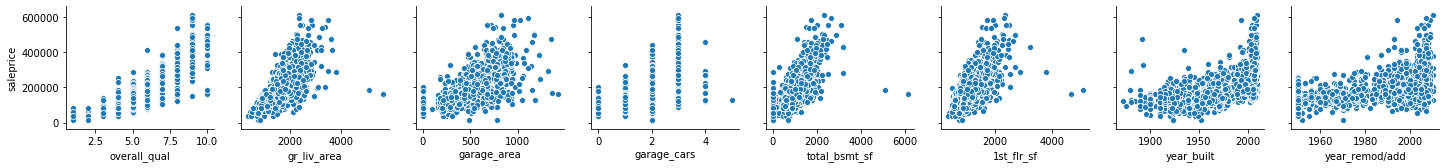

In [133]:
sns.pairplot(ames_train, x_vars = top_corr, y_vars = ['saleprice']);

Identifying potential outliers amongst the shortlisted numerical variables 

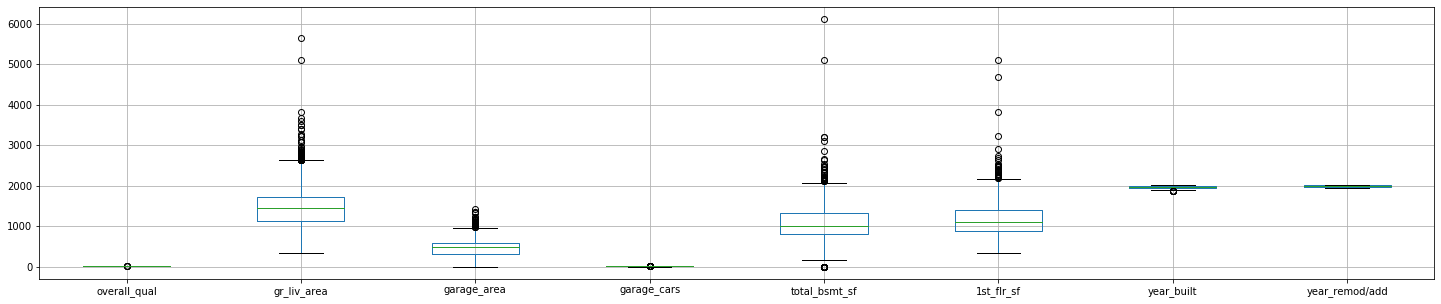

In [137]:
ames_allnum[top_corr].boxplot(figsize=(25,5));

Plotting the maximum, minimum and standard deviations of the top correlated numerical variables just to eyeball the general data distributions - but not that helpful

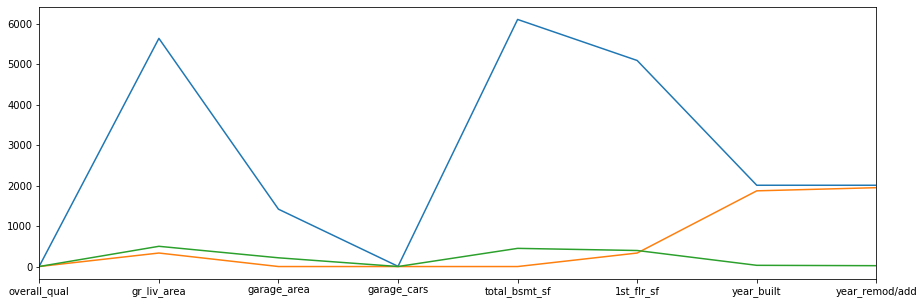

In [145]:
ames_allnum[top_corr].max().plot(figsize = (15,5));
ames_allnum[top_corr].min().plot(figsize = (15,5));
ames_allnum[top_corr].std().plot(figsize = (15,5));

**Dealing with the categorical variables** 

ames_allnum_name = ['id', 'pid', 'ms_subclass', 'lot_frontage', 'lot_area', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area',
       'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
       'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces',
       'garage_yr_blt', 'garage_cars', 'garage_area', 'wood_deck_sf',
       'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
       'pool_area', 'misc_val', 'mo_sold', 'yr_sold', 'saleprice']

In [164]:
#i am not sure why the commands below both do not work 
#ames_allcat = ames_train[[k for k in ames_train.columns not in ames_allnum_name]]
#ames_allcat = ames_train[[k for k in ames_train.columns not in ames_allnum.columns]]

In [165]:
ames_allcat = ames_train.select_dtypes(include=['object'])

In [156]:
ames_train.shape

(2051, 81)

In [155]:
ames_allnum.shape

(2051, 39)

In [166]:
ames_allcat.shape
#notice that this is the complement of allnum (81-39 =42)

(2051, 42)

In [167]:
ames_allcat.info() #we have selected for all the categorical object type variables 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 42 columns):
ms_zoning         2051 non-null object
street            2051 non-null object
alley             140 non-null object
lot_shape         2051 non-null object
land_contour      2051 non-null object
utilities         2051 non-null object
lot_config        2051 non-null object
land_slope        2051 non-null object
neighborhood      2051 non-null object
condition_1       2051 non-null object
condition_2       2051 non-null object
bldg_type         2051 non-null object
house_style       2051 non-null object
roof_style        2051 non-null object
roof_matl         2051 non-null object
exterior_1st      2051 non-null object
exterior_2nd      2051 non-null object
mas_vnr_type      2029 non-null object
exter_qual        2051 non-null object
exter_cond        2051 non-null object
foundation        2051 non-null object
bsmt_qual         1996 non-null object
bsmt_cond         1996 non-null obje

**Further segmenting the categorical variables into Ordinal, binary or nominal** 

In [211]:
ames_cat_ordinal = ['lot_shape','utilities','exter_qual','exter_cond','bsmt_qual','bsmt_cond',
                   'bsmtfin_type_1','bsmtfin_type_2', 'heating_qc','kitchen_qual','functional',
                   'fireplace_qu','garage_finish','garage_qual','garage_cond','pool_qc',
                   'fence']

#scale 1 being the worst 
#lotshape 1 irregular - 4 regular
#utilities 1 elo 4 allpub
#exterqual 1 poor 5 excellent 
#extercond 1 poor 5 excellent 
#bsmtqual 1poor 5 excellent
#bsmtcond 1poor 5 excellent
#bsmtfin_type_1 1 unfinished 6 good living quarters
#bsmtfin_type_2 1 unfinished 6 good living quarters
#heatingqc 1 poor 5 excellent 
#kitchenqual 1 poor 5 excellent 
#functional 1 salvage only 8 typical functionality 
#fireplacequ 1 poor 5 excellent
#garagefinish 1 unfinished 3 finished
#garagequal 1 poor 5 excellent
#garagecond 1 poor 5 excellent
#poolqc 1 fair 4 excellent
#fence 1 min wood/wire 4 good privacy 

ames_cat_binary = ['central_air', 'paved_drive','misc_feature']

#paveddrive has 3 categories but we can convert partial to a No 
#could treat miscfeature as a bonus (i.e. if a houe has any misc feature it gets a 1)
#we could also potentially treat fireplacequ, poolqc and fence as binary features too because majority of homes 
#do not have these features anyway

In [212]:
ames_cat_other = ames_cat_binary + ames_cat_ordinal

In [213]:
ames_cat_nominal = ames_allcat[[k for k in ames_allcat.columns if k not in ames_cat_other]]

In [214]:
ames_cat_ordinal = ames_allcat[ames_cat_ordinal]

In [215]:
ames_cat_binary = ames_allcat[ames_cat_binary]

In [217]:
print("All Cat variables:", ames_allcat.shape)
print("All Ordinal variables:",ames_cat_ordinal.shape)
print("All Binary variables:",ames_cat_binary.shape)
print("All Nominal variables:",ames_cat_nominal.shape)

All Cat variables: (2051, 42)
All Ordinal variables: (2051, 17)
All Binary variables: (2051, 3)
All Nominal variables: (2051, 22)


**Transforming Categorial Variables**

I will attempt to employ different methods to transform the different groups of categorical variables, then subsequently fit them into a model and then select the method that achieves the best score.

Current plan is to use:
- Mean encoding for nominal variables
- Dummy variable for binary variables `scale before creating dummies`
- Ordinal encoding for ordinal variables

Once all these categorical variables have been transformed into numeric types, i will be able to run .corr() regressions on all of them and sieve out the more important ones from there and combine it with the top correlated numerical variables to form my feature 'longlist'

After which I could run the VIF on the feature 'longlist' and cull those that exhibit multicollinearity. OR i could just fit everything into a model, get my baseline score. 

After that, cull via VIF selection, then use Lasso and then calculate my new score to compare against the baseline 


**Method 1: Mean Encoding for nominal variables**

- Potential pitfall: this method is infamous for eventual overfitting 
- How to counter: ensure that variables are scaled / employ VIF / Lasso later 


*From a mathematical point of view, mean encoding represents a probability of your target variable, conditional on each value of the feature. In a way, it embodies the target variable in its encoded value

https://towardsdatascience.com/why-you-should-try-mean-encoding-17057262cd0

In [260]:
ames_cat_nominal.columns

Index(['ms_zoning', 'street', 'alley', 'land_contour', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'foundation', 'bsmt_exposure',
       'heating', 'electrical', 'garage_type', 'sale_type'],
      dtype='object')

In [1033]:
ames_cat_nominal.head()

,ms_zoning,street,alley,land_contour,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,...,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,foundation,bsmt_exposure,heating,electrical,garage_type,sale_type
0,RL,Pave,NaN,Lvl,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,...,CompShg,HdBoard,Plywood,BrkFace,CBlock,No,GasA,SBrkr,Attchd,WD
1,RL,Pave,NaN,Lvl,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,...,CompShg,VinylSd,VinylSd,BrkFace,PConc,No,GasA,SBrkr,Attchd,WD
2,RL,Pave,NaN,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,...,CompShg,VinylSd,VinylSd,None,CBlock,No,GasA,SBrkr,Detchd,WD
3,RL,Pave,NaN,Lvl,Inside,Gtl,Timber,Norm,Norm,1Fam,...,CompShg,VinylSd,VinylSd,None,PConc,No,GasA,SBrkr,BuiltIn,WD
4,RL,Pave,NaN,Lvl,Inside,Gtl,SawyerW,Norm,Norm,1Fam,...,CompShg,Wd Sdng,Plywood,None,PConc,No,GasA,SBrkr,Detchd,WD


In [261]:
nominal_tf = pd.DataFrame(columns=['init'])
#creating an empty dataframe here to add transformed variables to for each categorical variable type 
#in this case starting with the nominal categorical variable types 

In [262]:
#'saleprice' is our target here 
#what mean_encode does is to record the total number of counts per category and the respective sum of its 
#target variable. Subseqeuntly the sum of target variable per category is divided by its count 
#meaning that 

def mean_encode(col):
    mean_en = ames_train.groupby(col)['saleprice'].mean()
    nominal_tf[col+'_mean_enc'] = ames_cat_nominal[col].map(mean_en)
    

In [263]:
#testing out mean_encode function with one of the variables 
mean_encode('ms_zoning')

In [264]:
#checking out what has been encoded into this column 
nominal_tf['ms_zoning_mean_enc'].unique()

array([191235.16458073, 129119.14240506, 218618.31683168,  78010.89473684,
        47300.        , 148859.57142857,  57625.        ])

In [265]:
nominal_tf.describe()

,ms_zoning_mean_enc
count,2051.000000
mean,181469.701609
std,26387.329525
min,47300.000000
25%,191235.164581
50%,191235.164581
75%,191235.164581
max,218618.316832


In [274]:
#ames_cat_nominal.apply(mean_encode)
#note that this will not work because apply function passes in your entire dataframe into the function, which you
#have currently only built to take in column names 

In [275]:
nom_names = ['ms_zoning', 'street', 'alley', 'land_contour', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'foundation', 'bsmt_exposure',
       'heating', 'electrical', 'garage_type', 'sale_type']

In [277]:
for i in nom_names:
    mean_encode(i)

In [284]:
#we can drop the 'init' placeholder column now that we have populated our dataframe 
nominal_tf.drop('init',axis=1,inplace=True)

Nominal_tf is a dataframe containing the mean encoded values of all the nominal categorical variables in the ames housing dataset

In [434]:
nominal_tf.head()

,ms_zoning_mean_enc,street_mean_enc,alley_mean_enc,land_contour_mean_enc,lot_config_mean_enc,land_slope_mean_enc,neighborhood_mean_enc,condition_1_mean_enc,condition_2_mean_enc,bldg_type_mean_enc,...,roof_matl_mean_enc,exterior_1st_mean_enc,exterior_2nd_mean_enc,mas_vnr_type_mean_enc,foundation_mean_enc,bsmt_exposure_mean_enc,heating_mean_enc,electrical_mean_enc,garage_type_mean_enc,sale_type_mean_enc
0,191235.164581,181793.565558,NaN,178998.56484,230744.358779,180358.476703,137181.909910,139685.714286,181382.075556,185275.685882,...,180849.197037,159582.473333,166485.713514,212161.436508,148415.530707,164533.532487,182422.47671,187770.382227,205040.195383,174912.251544
1,191235.164581,181793.565558,NaN,178998.56484,230744.358779,180358.476703,187760.160920,185007.310130,181382.075556,185275.685882,...,180849.197037,218174.082873,217798.685160,212161.436508,227676.483801,164533.532487,182422.47671,187770.382227,205040.195383,174912.251544
2,191235.164581,181793.565558,NaN,178998.56484,177537.014637,180358.476703,145905.816129,185007.310130,181382.075556,185275.685882,...,180849.197037,218174.082873,217798.685160,153679.275862,148415.530707,164533.532487,182422.47671,187770.382227,132132.947761,174912.251544
3,191235.164581,181793.565558,NaN,178998.56484,177537.014637,180358.476703,241051.354167,185007.310130,181382.075556,185275.685882,...,180849.197037,218174.082873,217798.685160,153679.275862,227676.483801,164533.532487,182422.47671,187770.382227,247883.522727,174912.251544
4,191235.164581,181793.565558,NaN,178998.56484,177537.014637,180358.476703,187760.160920,185007.310130,181382.075556,185275.685882,...,180849.197037,142940.887681,166485.713514,153679.275862,227676.483801,164533.532487,182422.47671,187770.382227,132132.947761,174912.251544


In [315]:
ames_cat_nominal.shape #ensuring that no variables have been left out, comparing to the unencoded dataframe

(2051, 22)

In [287]:
nominal_tf.shape

(2051, 22)

**Method 2: Ordinal Encoding for ordinal variables**

- Potential pitfall: this method assumes some kind of equivalence in differences for each unit increase 
- How to counter:

**Ordinal Scales (scale 1 being the worst)** 
<http://jse.amstat.org/v19n3/decock/DataDocumentation.txt>

**Order rank 3**
- garagefinish 1 unfinished 3 finished

**Order rank 4** (custom dict)
- lotshape 1 irregular - 4 regular
- utilities 1 elo 4 allpub
- poolqc 1 fair 4 excellent
- fence 1 min wood/wire 4 good privacy 

**Order rank 5** (standard dict)
- exterqual 1 poor 5 excellent 
- extercond 1 poor 5 excellent 
- bsmtqual 1poor 5 excellent
- bsmtcond 1poor 5 excellent
- heatingqc 1 poor 5 excellent 
- kitchenqual 1 poor 5 excellent 
- fireplacequ 1 poor 5 excellent
- garagequal 1 poor 5 excellent
- garagecond 1 poor 5 excellent

**Order rank 6**
- bsmtfin_type_1 1 unfinished 6 good living quarters
- bsmtfin_type_2 1 unfinished 6 good living quarters

**Order rank 8**
- functional 1 salvage only 8 typical functionality 


In [289]:
ames_cat_ordinal.shape

(2051, 17)

In [288]:
ames_cat_ordinal.head()

,lot_shape,utilities,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmtfin_type_1,bsmtfin_type_2,heating_qc,kitchen_qual,functional,fireplace_qu,garage_finish,garage_qual,garage_cond,pool_qc,fence
0,IR1,AllPub,Gd,TA,TA,TA,GLQ,Unf,Ex,Gd,Typ,NaN,RFn,TA,TA,NaN,NaN
1,IR1,AllPub,Gd,TA,Gd,TA,GLQ,Unf,Ex,Gd,Typ,TA,RFn,TA,TA,NaN,NaN
2,Reg,AllPub,TA,Gd,TA,TA,GLQ,Unf,TA,Gd,Typ,NaN,Unf,TA,TA,NaN,NaN
3,Reg,AllPub,TA,TA,Gd,TA,Unf,Unf,Gd,TA,Typ,NaN,Fin,TA,TA,NaN,NaN
4,IR1,AllPub,TA,TA,Fa,Gd,Unf,Unf,TA,TA,Typ,NaN,Unf,TA,TA,NaN,NaN


Need to create dictionaries to assign orders to each variable

In [291]:
ames_cat_ordinal['garage_cond'].unique()

array(['TA', 'Fa', nan, 'Po', 'Gd', 'Ex'], dtype=object)

In [293]:
#custom dict
garage_dict = {'Unf':1,'RFn':2,'Fin':3}

In [294]:
#standard dicts for those with 4 and 5 ranks 
rank4_dict = {'Fa': 1,'TA':2,'Gd':3,'Ex':4}
rank5_dict = {'Po': 1,'Fa': 2,'TA':3,'Gd':4,'Ex':5}
             

In [295]:
#custom dicts
lotshape_dict = {'IR3':1,'IR2':2,'IR1':3,'Reg':4}
utils_dict = {'ELO':1,'NoSeWa':2,'NoSewr':3,'AllPub':4}
fence_dict = {'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4}

In [296]:
bsmt_dict = {'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}

In [298]:
functional_dict = {'Sal':1,'Sev':2,'Maj2':3,'Maj1':4,'Mod':5,'Min2':6,'Min1':7,'Typ':8}

Assigning dictionary ordinal values to ordinal category variables 

In [292]:
ordinal_tf = pd.DataFrame(columns=['init']) #creating an empty dataframe to store my transformed ordinal variables

In [299]:
ordinal_tf['garage_finish_ord'] = ames_cat_ordinal['garage_finish'].map(garage_dict)

In [300]:
ordinal_tf.head() #checking to ensure that we have correctly mapped over our ordinal values 

,init,garage_finish_ord
0,NaN,2.0
1,NaN,2.0
2,NaN,1.0
3,NaN,3.0
4,NaN,1.0


Rank 3 and 4s

In [301]:
ordinal_tf['lot_shape_ord'] = ames_cat_ordinal['lot_shape'].map(lotshape_dict)

In [302]:
ordinal_tf['utilities_ord'] = ames_cat_ordinal['utilities'].map(utils_dict)

In [303]:
ordinal_tf['fence_ord'] = ames_cat_ordinal['fence'].map(fence_dict)

In [304]:
ordinal_tf['pool_qc_ord'] = ames_cat_ordinal['pool_qc'].map(rank4_dict)

Rank 5s and more

In [318]:
rank5_names = ['exter_qual','exter_cond','bsmt_qual','bsmt_cond','heating_qc',
              'kitchen_qual','fireplace_qu','garage_qual','garage_cond']

In [319]:
def ord_encode(col):
    ordinal_tf[col+'_ord'] = ames_cat_ordinal[col].map(rank5_dict)

In [320]:
for i in rank5_names:
    ord_encode(i)

In [362]:
rank6_names = ['bsmtfin_type_1','bsmtfin_type_2']

def ord_encode2(col):
    ordinal_tf[col+'_ord'] = ames_cat_ordinal[col].map(bsmt_dict)

for i in rank6_names:
    ord_encode2(i)

In [310]:
ordinal_tf['functional_ord'] = ames_cat_ordinal['functional'].map(functional_dict)

In [323]:
ordinal_tf.drop('init',axis=1,inplace=True)

**checking on completed ordinal dataframe**

In [313]:
ames_cat_ordinal.shape

(2051, 17)

In [324]:
ordinal_tf.shape

(2051, 17)

In [325]:
ordinal_tf.head()

,garage_finish_ord,lot_shape_ord,utilities_ord,fence_ord,pool_qc_ord,exter_qual_ord,exter_cond_ord,bsmt_cond_ord,heating_qc_ord,kitchen_qual_ord,fireplace_qu_ord,garage_qual_ord,garage_cond_ord,bsmtfin_type_1_ord,bsmtfin_type_2_ord,functional_ord,bsmt_qual_ord
0,2.0,3,4,NaN,NaN,4,3,3.0,5,4,NaN,3.0,3.0,NaN,NaN,8,3.0
1,2.0,3,4,NaN,NaN,4,3,3.0,5,4,3.0,3.0,3.0,NaN,NaN,8,4.0
2,1.0,4,4,NaN,NaN,3,4,3.0,3,4,NaN,3.0,3.0,NaN,NaN,8,3.0
3,3.0,4,4,NaN,NaN,3,3,3.0,4,3,NaN,3.0,3.0,NaN,NaN,8,4.0
4,1.0,3,4,NaN,NaN,3,3,4.0,3,3,NaN,3.0,3.0,NaN,NaN,8,2.0


**Method 3: Dummy Variables for binary variables**

In [316]:
ames_cat_binary.head()

,central_air,paved_drive,misc_feature
0,Y,Y,NaN
1,Y,Y,NaN
2,Y,Y,NaN
3,Y,Y,NaN
4,Y,N,NaN


In [327]:
binary_tf = pd.DataFrame(columns=['init']) #creating an empty dataframe to store my transformed ordinal variables

In [422]:
binary_tf['central_air_dum'] = [1 if i == 'Y' else 0 for i in ames_cat_binary['central_air']]

#binary_tf['init'] = [1 if np.isnan(i) else 0 for i in ames_cat_binary['central_air'].values]
#trying to understand if the nan values can be converted using a boolean statement 
#the code above does not work though 

In [329]:
binary_tf.head()

,init,central_air_dum
0,NaN,1
1,NaN,1
2,NaN,1
3,NaN,1
4,NaN,1


In [330]:
binary_tf['paved_drive_dum'] = [1 if i == 'Y' else 0 for i in ames_cat_binary['paved_drive']]

In [343]:
binary_tf['misc_feature_dum'] = [1 if i in ['Elev','Gar2','Othr','Shed','TenC'] 
                                 else 0 for i in ames_cat_binary['misc_feature']]
#find out how to code for NaN values e.g. 0 if i == 'NaN' > this code did not work 

In [332]:
binary_tf.drop('init',axis=1,inplace=True)

In [333]:
ames_cat_binary.shape

(2051, 3)

In [334]:
binary_tf.shape

(2051, 3)

In [344]:
binary_tf.head()

,central_air_dum,paved_drive_dum,misc_feature_dum
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,0,0


**At this stage we have encoded all our categorical variables into 3 separate data frames: Nominal, Ordinal and Binary. I am now going to combine the Nominal and Ordinal dataframes so that i can scale them separately from the binary dataframe**

In [363]:
ames_nom_ord = pd.concat([nominal_tf, ordinal_tf], axis=1)

In [347]:
ames_nom_ord.shape #sense check 

(2051, 39)

In [348]:
nominal_tf.shape

(2051, 22)

In [349]:
ordinal_tf.shape

(2051, 17)

Adding the target variable 'salesprice' into the combined nominal and ordinal dataframe

In [364]:
ames_nom_ord['target'] = ames_train['saleprice']

Going to replicate the analysis we did above with our numerical variables to figure out which of the transformed categorical variables are more highly correlated with saleprice 

In [367]:
ames_nomord_reg = ames_nom_ord.corr()

In [368]:
ames_nomord_reg['target'].sort_values()

lot_shape_ord            -0.294542
bsmtfin_type_2_ord       -0.021038
utilities_ord             0.026404
exter_cond_ord            0.036418
land_slope_mean_enc       0.063163
street_mean_enc           0.069841
roof_matl_mean_enc        0.110623
heating_mean_enc          0.111181
functional_ord            0.125682
garage_cond_ord           0.152981
condition_2_mean_enc      0.161266
lot_config_mean_enc       0.164137
bsmt_cond_ord             0.176309
bldg_type_mean_enc        0.201220
garage_qual_ord           0.209884
fence_ord                 0.217405
condition_1_mean_enc      0.222024
land_contour_mean_enc     0.233183
electrical_mean_enc       0.257219
roof_style_mean_enc       0.268874
house_style_mean_enc      0.274636
fireplace_qu_ord          0.321086
bsmtfin_type_1_ord        0.324551
ms_zoning_mean_enc        0.332927
sale_type_mean_enc        0.377781
exterior_2nd_mean_enc     0.420871
bsmt_exposure_mean_enc    0.421535
pool_qc_ord               0.422219
exterior_1st_mean_en

In [370]:
#adding anything that has >= 0.5 correlation coefficient and a few negatively correlated ones
top_nomord = ['neighbourhood_mean_enc','exter_qual_ord','kitchen_qual_ord','bsmt_qual_ord',
             'alley_mean_enc','foundation_mean_enc','garage_finish_ord','lot_shape_ord']

In [399]:
#subsetting the top nom and ord vars into a new df 
top_nomord_df = ames_nom_ord.loc[:,top_nomord]
top_nomord_df.shape

(2051, 8)

**Model Prep: Creating feature matrix (x) and target vector (y)**

Creating our final list of features: top numerical and ordinal, nominal cat, and dummy variables

For reference to rmb what the top numerical vars are: 
top_corr = ['overall_qual', 'gr_liv_area','garage_area','garage_cars','total_bsmt_sf','1st_flr_sf','year_built',
           'year_remod/add']

In [401]:
top_corr_num.shape

(2051, 8)

**Combining top features into a single df**

In [405]:
all_features = pd.concat([top_corr_num , top_nomord_df, binary_tf], axis=1)
#combining num, ord and nom vars into a single df. Adding these vars first to scale, then add dummy vars after 
#slight problem:
#i have to train-test-split and scale based on the tts train set. however if i append dummy vars after, 
#then it would not have been trained-tested or split so... i have no choice but to tts and scale it tgd?
#but this would mean that my dummy vars would have to be scaled to some weird value? 

In [406]:
all_features.shape #sense check - all 19 columns are in place so that's good

(2051, 19)

In [407]:
all_features.head()

,overall_qual,gr_liv_area,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,neighbourhood_mean_enc,exter_qual_ord,kitchen_qual_ord,bsmt_qual_ord,alley_mean_enc,foundation_mean_enc,garage_finish_ord,lot_shape_ord,central_air_dum,paved_drive_dum,misc_feature_dum
0,6,1479,475.0,2.0,725.0,725,1976,2005,NaN,4,4,3.0,NaN,148415.530707,2.0,3,1,1,0
1,7,2122,559.0,2.0,913.0,913,1996,1997,NaN,4,4,4.0,NaN,227676.483801,2.0,3,1,1,0
2,5,1057,246.0,1.0,1057.0,1057,1953,2007,NaN,3,4,3.0,NaN,148415.530707,1.0,4,1,1,0
3,5,1444,400.0,2.0,384.0,744,2006,2007,NaN,3,3,4.0,NaN,227676.483801,3.0,4,1,1,0
4,6,1445,484.0,2.0,676.0,831,1900,1993,NaN,3,3,2.0,NaN,227676.483801,1.0,3,1,0,0


Going to remove all the NaN values from the dataframe

In [424]:
all_features.fillna(0,inplace=True)

In [425]:
all_features.isnull().sum()

overall_qual              0
gr_liv_area               0
garage_area               0
garage_cars               0
total_bsmt_sf             0
1st_flr_sf                0
year_built                0
year_remod/add            0
neighbourhood_mean_enc    0
exter_qual_ord            0
kitchen_qual_ord          0
bsmt_qual_ord             0
alley_mean_enc            0
foundation_mean_enc       0
garage_finish_ord         0
lot_shape_ord             0
central_air_dum           0
paved_drive_dum           0
misc_feature_dum          0
dtype: int64

**Train Test Split**

In [436]:
X = all_features
y = ames_train['saleprice']

In [437]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [443]:
#checking to ensure that 80% of the data has been allocated to the training set and 20% to the test set. 
print ("X train shape, Y train shape :", X_train.shape, y_train.shape)
print ("X test shape, Y test shape :", X_test.shape, y_test.shape)

X train shape, Y train shape : (1640, 19) (1640,)
X test shape, Y test shape : (411, 19) (411,)


**Scaling top Numerical, Ordinal and Nominal categorical variables**

In [438]:
ss = StandardScaler()

In [439]:
X_train_ss = ss.fit_transform(X_train)
#fitting the scaler model to our training set 

In [440]:
X_test_ss = ss.transform(X_test)
#using the fitted model to scale our test set 

**Instantiating our models**

We'll be using `LinearRegression`, `LassoCV` and `RidgeCV`, so we'll need to create instances of all three models.

In [441]:
lr = LinearRegression()

In [444]:
#this will be our basic model
model = lr.fit(X_train_ss, y_train)

In [555]:
#creating a baseline stat model too to glean more info
import statsmodels.api as sm

X_stat = sm.add_constant(X)
#y is defined above alr

stat_model = sm.OLS(y, X_stat)
stat_model = stat_model.fit()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


**Baseline Model Evaluation**

In [445]:
train_score = lr.score(X_train_ss, y_train)
print("Baseline Model train_score:", train_score)

Baseline Model train_score: 0.8020482376099151


In [446]:
test_score = lr.score(X_test_ss, y_test)
print("Baseline Model test_score:", test_score)

Baseline Model test_score: 0.8555231576919783


**RMSE**

In [452]:
from sklearn.metrics import mean_squared_error

y_pred = lr.predict(X_test_ss)

#mean_squared_error(y_true, y_pred)
baseline_MSE = mean_squared_error(y_test, y_pred)
baseline_RMSE = np.sqrt(baseline_MSE)

print("Baseline Model RMSE:", baseline_RMSE)

Baseline Model RMSE: 29298.6586225011


In [448]:
stat_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     489.5
Date:                Thu, 21 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:15:28   Log-Likelihood:                -24329.
No. Observations:                2051   AIC:                         4.870e+04
Df Residuals:                    2032   BIC:                         4.880e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -3.359e+05   1.21e+05     -2.767      0.006   -5.74e+05   -9.78e+04
overall_qual            1.328e+04   1006.748     13.189      0.000    1.13e+04    1.53e+04
gr_liv_area               41.0037      2.148     19.088      0.000      36.791      45.217
garage_area               33.0787      8.256      4.007      0.000      16.888      49.269
garage_cars             3808.6386   2397.545      1.589      0.112    -893.264    8510.542
total_bsmt_sf              7.3242      3.649      2.007      0.045       0.168      14.480
1st_flr_sf                22.6912      4.004      5.667      0.000      14.838      30.544
year_built                31.0538     47.482      0.654      0.513     -62.066     124.173
year_remod/add            69.2855     54.246      1.277      0.202     -37.097     175.668
neighbourhood_mean_enc -3.045e-10    1.1e-10     -2.778      0.006   -5.19e-10   -8.95e-11
exter_qual_ord          1.501e+04   2301.513      6.522      0.000    1.05e+04    1.95e+04
kitchen_qual_ord        1.486e+04   1852.082      8.023      0.000    1.12e+04    1.85e+04
bsmt_qual_ord           8059.5153   1452.029      5.551      0.000    5211.895    1.09e+04
alley_mean_enc            -0.1060      0.022     -4.808      0.000      -0.149      -0.063
foundation_mean_enc       -0.0135      0.029     -0.470      0.638      -0.070       0.043
garage_finish_ord       2408.8745   1181.089      2.040      0.042      92.604    4725.145
lot_shape_ord          -3223.2406   1433.652     -2.248      0.025   -6034.821    -411.660
central_air_dum        -1312.4906   3417.409     -0.384      0.701   -8014.482    5389.501
paved_drive_dum          197.1003   3112.480      0.063      0.950   -5906.883    6301.084
misc_feature_dum       -5302.3653   4373.543     -1.212      0.226   -1.39e+04    3274.731
==============================================================================
Omnibus:                      830.311   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            78807.169
Skew:                          -0.952   Prob(JB):                         0.00
Kurtosis:                      33.307   Cond. No.                     7.39e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.31e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [449]:
#these 7 variables have high t-test p values. strange that year built appears insignificant as it previously ran 
#a high correlation against the target var
#garage_cars 0.112
#yearbuilt 0.513
#yearremod 0.202
#foundation 0.638
#centra_air 0.701
#paved 0.950
#misc_feature 0.226

**K-Fold Cross Validation** 

In [442]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=10)
print(lr_scores)
print(lr_scores.mean())

[0.86485124 0.83015069 0.79762124 0.81684913 0.81939452 0.82564035
 0.84166456 0.71798323 0.49109148 0.82608055]
0.7831326986160876


The K-fold scores seem rather consistent indicating low variance. The mean score of 0.78 is a relatively strong score too. This is a relatively good start for a base model. 

**Short Checkpoint Summary** 

At this point, we have fitted our first baseline model, which has been fitted using a linear regression model using the top num corr vars and the top ordinal, nominal and binary categorical vars that have been transformed to num vars. All variables have also been scaled using standardscaler( )

There are currently 19 variables in this baseline model, of which 11 are categorial and 8 are numerical. 19 out of the original 81 variables so that's about 25% of the total number of initial variables. 

The R-score is looking positive for now at 0.8 and the k-fold cross validation results also indicate that the model does not have high variance. 

The statsmodel OLS model scores similarly provided positive R^2 score of 0.813 and an adjusted R^2 of 0.811. The F-stat score is also highly significant at 0.00 indicating that the fitted model is performing better than the naive model. However the individual variable t-test p-values show that 7 of the 19 variables are >0.05 which imply that they are not significant in predicting house saleprice. 

My current baseline model RMSE is 29,298 which is relatively decent compared to other kagglers on the leaderboard.


However, given that i had employed mean encoding on my ordinal categorical variables earlier, i should check the model for multicollinearity using Variance Inflation Factor (VIF) and will also employ Ridge and Lasso regularization to see how that changes the R^2 scores. 

I will also recursively remove the variables that have high T-test p values and evaluate the impact on the R^2 score.

**Regularization using Ridge and Lasso regressions**

Will also optimize for hyper parameters using Gridsearch

**Ridge Regression**

In [453]:
#importing Ridge regression and Gridsearch 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.model_selection import GridSearchCV

In [459]:
# np.logspace gives us points between specified orders of magnitude on a logarithmic scale. It is base 10.
#generated a list of 200 alpha values
r_alphas = np.logspace(0, 5, 200)
ridge_parameters = {'alpha': r_alphas }

In [462]:
r_alphas[:10]

array([1.        , 1.05956018, 1.12266777, 1.18953407, 1.26038293,
       1.33545156, 1.4149913 , 1.49926843, 1.58856513, 1.68318035])

In [460]:
#using Gridsearch to find the optimal alpha value for ridge regression
ridge_gridsearch = GridSearchCV(Ridge(), ridge_parameters, cv = 5, verbose=1)

In [461]:
ridge_gridsearch = ridge_gridsearch.fit(X_train_ss, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.8s finished


In [463]:
#finding the best ridge score 
#the best score is lower than my baseline score so... i'm not sure whether that implies that there is no 
#multicollinearity and hence the model cannot be improved, or i have not put in the right alpha values 
ridge_gridsearch.best_score_

0.7851570569267872

In [483]:
#i will attempt to use different alpha values 
r_alphas = np.logspace(-10, 100, 200)
ridge_parameters = {'alpha': r_alphas }

In [484]:
#seems like expanding the range of alpha values that i'm optimizing on does not have an impact on the best score 
ridge_gridsearch = ridge_gridsearch.fit(X_train_ss, y_train)
ridge_gridsearch.best_score_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.9s finished


0.7851570569267872

In [489]:
best_fit_ridge = ridge_gridsearch.best_estimator_ 
best_fit_ridgescore = best_fit_ridge.score(X_test_ss,y_test)
print("Best fit Ridge Score:", best_fit_ridgescore)

Best fit Ridge Score: 0.8538839109527178


Understanding how the Ridge regression has evaluated the variables by studying the magnitude of the coefficients 

In [1038]:
best_fit_ridge.coef_

array([16179.6978119 , 18832.13099504,  5612.73615169,  5177.9352955 ,
        4392.2880607 ,  8195.18912854,   418.17449168,  2135.2664303 ,
           0.        ,  9517.76948128,  9424.23298118,  6746.57170738,
       -3458.91888179,   539.19520139,  2672.08461008, -1716.06481571,
         256.51151508,   580.21563777, -1205.45113147])

**Lasso Regression**

In [472]:
from sklearn.linear_model import Lasso

In [473]:
l_alphas = np.arange(0.001, 0.15, 0.0025)
lasso_parameters = {'alpha': l_alphas }

In [474]:
#using Gridsearch to find the optimal alpha value for ridge regression
lasso_gridsearch = GridSearchCV(Lasso(), lasso_parameters, cv = 5, verbose=1)

In [475]:
lasso_gridsearch = lasso_gridsearch.fit(X_train_ss, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.8s finished


In [476]:
lasso_gridsearch.best_score_

0.7810944398609075

In [477]:
#changing up my alpha values - similar to ridge regression - doesn't improve my baseline score 
l_alphas = np.arange(0.01, 1.5, 0.025)
lasso_parameters = {'alpha': l_alphas }

In [478]:
lasso_gridsearch = lasso_gridsearch.fit(X_train_ss, y_train)
lasso_gridsearch.best_score_

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.8s finished


0.7810944398609075

In [485]:
lasso_gridsearch.best_params_

{'alpha': 0.1485}

In [491]:
best_fit_lasso = lasso_gridsearch.best_estimator_ 
best_fit_lasso_score = best_fit_lasso.score(X_test_ss,y_test)
print("Best Fit Laso Score:", best_fit_lasso_score)

Best Fit Laso Score: 0.8555235910676661


Understanding how the lasso regression has evaluated the variables by studying the magnitude of the coefficients 

In [1036]:
best_fit_lasso.coef_

array([18573.05684001, 20708.3136956 ,  5655.1369921 ,  4565.53380324,
        2724.51246834,  8775.49925488,   -65.98542413,  1365.83970571,
           0.        ,  9861.56421426,  9494.7712503 ,  7677.3728718 ,
       -4013.7194659 ,  -323.89037509,  2146.11631557, -1502.45932924,
         226.24061034,   428.95515519, -1326.39199473])

In [1037]:
all_features.columns

Index(['overall_qual', 'gr_liv_area', 'garage_area', 'garage_cars',
       'total_bsmt_sf', '1st_flr_sf', 'year_built', 'year_remod/add',
       'neighbourhood_mean_enc', 'exter_qual_ord', 'kitchen_qual_ord',
       'bsmt_qual_ord', 'alley_mean_enc', 'foundation_mean_enc',
       'garage_finish_ord', 'lot_shape_ord', 'central_air_dum',
       'paved_drive_dum', 'misc_feature_dum'],
      dtype='object')

**Results summary** 

My best fit ridge regression test scores (0.853), lasso regression score (0.855) and lin reg baseline model score (0.855) are all approxiamtely similar. 

I will just be adopting my baseline lin reg model then since it is less computationally expensive and achieves a similar score to the regularised model. 

The coefs from both the Ridge and Lasso regressions show that the 'neighbourhood_mean_enc' function is insignificant - however the OLS fitted model shows that the same function is statistically significant based on it's T-test p-value. 


**Additional cleaning** 

recursive feature elimination? Manually removing the variables with high T-test p-values based on my Statsmodel OLS scores.

maybe test out some interactions.

In [ ]:
#Removing these because they have high T-test p-values 
#garage_cars 0.112
#yearbuilt 0.513
#yearremod 0.202
#foundation 0.638
#centra_air 0.701
#paved 0.950
#misc_feature 0.226

#Round 2 results after removing the above 
#total_bsmt_sq returned 0.09 so i am going to remove this too 

In [544]:
all_features.shape

(2051, 19)

In [545]:
all_features.columns

Index(['overall_qual', 'gr_liv_area', 'garage_area', 'garage_cars',
       'total_bsmt_sf', '1st_flr_sf', 'year_built', 'year_remod/add',
       'neighbourhood_mean_enc', 'exter_qual_ord', 'kitchen_qual_ord',
       'bsmt_qual_ord', 'alley_mean_enc', 'foundation_mean_enc',
       'garage_finish_ord', 'lot_shape_ord', 'central_air_dum',
       'paved_drive_dum', 'misc_feature_dum'],
      dtype='object')

In [955]:
all_features2 = ['overall_qual', 'gr_liv_area', 'garage_area', 
                 '1st_flr_sf', 'exter_qual_ord','kitchen_qual_ord',
                 'bsmt_qual_ord','garage_finish_ord']

In [956]:
all_features2 = all_features[[k for k in all_features2]]

In [957]:
all_features2.shape

(2051, 8)

Replacing Alley and Neighborhood mean_encode with dummy variables 

In [958]:
nh_dummy = pd.get_dummies(ames_train['neighborhood'], drop_first=True)
#generating n-1 dummy variables

alley_dummy = pd.get_dummies(ames_train['alley'], drop_first=True)

In [959]:
nh_dummy.shape

(2051, 27)

In [960]:
alley_dummy.shape

(2051, 1)

In [961]:
nh_dummy.head()

,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,Greens,GrnHill,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


We are dropping these dummy variables due to high T-test p-value 

i'm not sure why the code below does not work it keeps telling me that those headers are not in my all_feature2 list when they clearly are?... so i'm just going to drop it from the dummy df instead

dummy_drop = ['lot_shape_ord','Blueste','BrDale','BrkSide','Edwards','Greens','Landmrk',
              'IDOTRR','MeadowV','NPkVill','NWAmes','OldTown','SWISU','Sawyer','Pave']

all_features2.drop(dummy_drop, axis=1)

going to drop 'GrnHill' too as it is not present in the test set 

In [962]:
nh_dummy.drop(['Blueste','BrDale','BrkSide','Edwards','Greens','Landmrk','Gilbert',
               'IDOTRR','MeadowV','NPkVill','NWAmes','OldTown','SWISU','SawyerW','GrnHill'],axis=1,inplace=True)

In [963]:
nh_dummy.shape #checking to ensure that we dropped 14 vars 

(2051, 12)

In [964]:
#Concatenating the dummy variable columns with the other binary vars 
all_features2 = pd.concat([all_features2, nh_dummy], axis=1)
all_features2.shape # 8 + 13 = 21 so that should be right 

#i'm going to leave out alley_dummy because it's has only 1 feature, pave, which has a high t-test p-value

(2051, 20)

**Train Test Split**

Adding the houing IDs back here before train test split, removing the IDs from the split before scaling, scale the predictive vars and then add it back in.  -- any better way to deal with the housing IDs???

In [965]:
all_features2 = pd.concat([all_features2,ames_train['id']], axis=1)

In [966]:
all_features2.columns

Index(['overall_qual', 'gr_liv_area', 'garage_area', '1st_flr_sf',
       'exter_qual_ord', 'kitchen_qual_ord', 'bsmt_qual_ord',
       'garage_finish_ord', 'ClearCr', 'CollgCr', 'Crawfor', 'Mitchel',
       'NAmes', 'NoRidge', 'NridgHt', 'Sawyer', 'Somerst', 'StoneBr', 'Timber',
       'Veenker', 'id'],
      dtype='object')

In [967]:
X2 = all_features2
y = ames_train['saleprice']

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

#checking to ensure that 80% of the data has been allocated to the training set and 20% to the test set. 
print ("X train shape, Y train shape :", X2_train.shape, y_train.shape)
print ("X test shape, Y test shape :", X2_test.shape, y_test.shape)

X train shape, Y train shape : (1640, 21) (1640,)
X test shape, Y test shape : (411, 21) (411,)


Assigning the unscaled train and test ids as separate objects 

In [968]:
X2_trainid = X2_train['id'] 
X2_testid = X2_test['id']

In [969]:
X2_train.drop('id',axis=1, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [970]:
X2_test.drop('id',axis=1, inplace=True)

In [971]:
X2_test.columns

Index(['overall_qual', 'gr_liv_area', 'garage_area', '1st_flr_sf',
       'exter_qual_ord', 'kitchen_qual_ord', 'bsmt_qual_ord',
       'garage_finish_ord', 'ClearCr', 'CollgCr', 'Crawfor', 'Mitchel',
       'NAmes', 'NoRidge', 'NridgHt', 'Sawyer', 'Somerst', 'StoneBr', 'Timber',
       'Veenker'],
      dtype='object')

In [972]:
X2_train.columns

Index(['overall_qual', 'gr_liv_area', 'garage_area', '1st_flr_sf',
       'exter_qual_ord', 'kitchen_qual_ord', 'bsmt_qual_ord',
       'garage_finish_ord', 'ClearCr', 'CollgCr', 'Crawfor', 'Mitchel',
       'NAmes', 'NoRidge', 'NridgHt', 'Sawyer', 'Somerst', 'StoneBr', 'Timber',
       'Veenker'],
      dtype='object')

**re-inserting id column**

Before we scale and fit we are going to drop the house ID columns. Since we have alr stored the train and test ids as separate objects before scaling we can just re-insert it after getting the predicted results 

**Scaling**

In [973]:
ss = StandardScaler()
X2_train_ss = ss.fit_transform(X2_train)
#fitting the scaler model to our training set 
X2_test_ss = ss.transform(X2_test)
#using the fitted model to scale our test set 

**Fitting with Lin Reg Model (model2)**

A reminder here that the difference btw baseline model 2 and baseline model is that we have removed 8 variables that have high T-test p-values and have also dummified 2 of the nominal variables (instead of the previou mean encoding) 

In [974]:
lr = LinearRegression()
#this will be our basic model
model2 = lr.fit(X2_train_ss, y_train)

train_score2 = lr.score(X2_train_ss, y_train)
print("Baseline Model train_score2:", train_score2)

test_score2 = lr.score(X2_test_ss, y_test)
print("Baseline Model test_score2:", test_score2)


Baseline Model train_score2: 0.8288091201672623
Baseline Model test_score2: 0.8596041754994881


In [978]:
#creating a baseline stat model too to glean more info
import statsmodels.api as sm

X2_stat = sm.add_constant(X2)
#y is defined above alr

stat_model2 = sm.OLS(y, X2_stat)
stat_model2 = stat_model2.fit()

In [976]:
stat_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     490.1
Date:                Sat, 23 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:19:10   Log-Likelihood:                -24196.
No. Observations:                2051   AIC:                         4.844e+04
Df Residuals:                    2029   BIC:                         4.856e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.286e+05   6201.934    -20.739      0.000   -1.41e+05   -1.16e+05
overall_qual       1.161e+04    954.174     12.172      0.000    9743.244    1.35e+04
gr_liv_area          39.2082      2.053     19.095      0.000      35.181      43.235
garage_area          37.2453      4.651      8.008      0.000      28.124      46.366
1st_flr_sf           23.9610      2.434      9.846      0.000      19.188      28.734
exter_qual_ord     1.139e+04   2156.694      5.282      0.000    7162.500    1.56e+04
kitchen_qual_ord   1.318e+04   1690.702      7.796      0.000    9864.267    1.65e+04
bsmt_qual_ord      8654.4077   1110.040      7.796      0.000    6477.471    1.08e+04
garage_finish_ord  4684.7335   1039.005      4.509      0.000    2647.105    6722.362
ClearCr            2.954e+04   6376.430      4.632      0.000     1.7e+04     4.2e+04
CollgCr            7707.8403   2892.582      2.665      0.008    2035.099    1.34e+04
Crawfor            2.644e+04   4045.836      6.534      0.000    1.85e+04    3.44e+04
Mitchel            1.157e+04   3850.702      3.004      0.003    4015.658    1.91e+04
NAmes              8402.1114   2250.974      3.733      0.000    3987.650    1.28e+04
NoRidge            4.792e+04   5198.019      9.218      0.000    3.77e+04    5.81e+04
NridgHt            5.144e+04   3884.716     13.242      0.000    4.38e+04    5.91e+04
Sawyer             1.073e+04   3340.338      3.213      0.001    4181.928    1.73e+04
Somerst            1.064e+04   3430.536      3.100      0.002    3907.722    1.74e+04
StoneBr             6.48e+04   5752.984     11.264      0.000    5.35e+04    7.61e+04
Timber             1.955e+04   5014.200      3.900      0.000    9720.035    2.94e+04
Veenker            2.588e+04   8056.043      3.213      0.001    1.01e+04    4.17e+04
id                    0.2191      0.861      0.254      0.799      -1.470       1.908
==============================================================================
Omnibus:                      684.687   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42601.720
Skew:                          -0.722   Prob(JB):                         0.00
Kurtosis:                      25.281   Cond. No.                     3.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Overall R^2 score deproved slightly from the previous baseline of 0.855 to 0.834 after convering my mean encoded vars to dummy vars. All the T-test p-values are <0.05 now so all seems good. Summary here still shows 'id' even though i've dropped it because the constant will somehow not take in X2_train_ss instead of X2 as an argument

In [791]:
from sklearn.metrics import mean_squared_error

y2_pred = lr.predict(X2_test_ss)

#mean_squared_error(y_true, y_pred)
baseline_MSE2 = mean_squared_error(y_test, y2_pred)
baseline_RMSE2 = np.sqrt(baseline_MSE)

print("Baseline Model 2 RMSE:", baseline_RMSE2)

Baseline Model 2 RMSE: 29298.6586225011


Taking a look at the predicted house saleprices agains the actual sale prices for a sense check 

In [801]:
y2_pred[:10]

array([123696.71744477, 219317.18338715, 310210.97095493, 136935.59647649,
       214158.61173057, 366236.19272302, 185170.48494412, 332834.63184433,
       139917.53453356,  91347.8086774 ])

In [802]:
ames_train['saleprice'].head()

0    130500
1    220000
2    109000
3    174000
4    138500
Name: saleprice, dtype: int64

I am having so much trouble trying to reconvert my housing id column and housing predicted sale price column into a dataframe. both were originally in array format so i converted it into a list, zipped it together (but this results in a tuple in a list) and then i created an index to zip them together to form a dictionary but this does not work either because of the tuple in the list issue 

In [917]:
#X2_testid
#we can just re-insert the un-scaled house Ids here because we stored them as a separate object before after they were
#spit during the tts stage but before they were scaled 
model2_pred_df = pd.DataFrame(submit, columns = ['id','predict_saleprice'])

In [925]:
#len(X2_testid)
X2_testidd = list(X2_testid)

In [926]:
y2_predd = list(y2_pred)

In [927]:
submit = zip(X2_testidd, y2_predd)
#submit = dict(submit)

In [923]:
submit = list(submit)


In [914]:
len(submit)

411

In [915]:
index = [k for k in range(len(submit))]

In [919]:
submit = zip(index, submit)
submit = dict(submit)
#submit

In [918]:
model2_pred_df.head()

,id,predict_saleprice


# Using similar methods applied on train data to clean up test data set and predict Kaggle test set using best fitted model 

In [526]:
ames_test.columns = [x.lower().replace(' ','_') for x in ames_test.columns]

In [527]:
amestest_allnum = ames_test.select_dtypes(include=['float64','int64'])

In [528]:
amestest_allcat = ames_test.select_dtypes(include=['object'])

In [529]:
#sense check - they should add up to 80. 38 + 42 = 80 so all seems fine. train set has 81 but that's because the 
#target variable sale price has been left out from the test set 
amestest_allnum.shape

(879, 38)

In [530]:
amestest_allcat.shape

(879, 42)

**Cleaning up the Categorial Test Data** 

In [531]:
amestest_cat_ordinal = ['lot_shape','utilities','exter_qual','exter_cond','bsmt_qual','bsmt_cond',
                   'bsmtfin_type_1','bsmtfin_type_2', 'heating_qc','kitchen_qual','functional',
                   'fireplace_qu','garage_finish','garage_qual','garage_cond','pool_qc',
                   'fence']

#scale 1 being the worst 
#lotshape 1 irregular - 4 regular
#utilities 1 elo 4 allpub
#exterqual 1 poor 5 excellent 
#extercond 1 poor 5 excellent 
#bsmtqual 1poor 5 excellent
#bsmtcond 1poor 5 excellent
#bsmtfin_type_1 1 unfinished 6 good living quarters
#bsmtfin_type_2 1 unfinished 6 good living quarters
#heatingqc 1 poor 5 excellent 
#kitchenqual 1 poor 5 excellent 
#functional 1 salvage only 8 typical functionality 
#fireplacequ 1 poor 5 excellent
#garagefinish 1 unfinished 3 finished
#garagequal 1 poor 5 excellent
#garagecond 1 poor 5 excellent
#poolqc 1 fair 4 excellent
#fence 1 min wood/wire 4 good privacy 

amestest_cat_binary = ['central_air', 'paved_drive','misc_feature']

#paveddrive has 3 categories but we can convert partial to a No 
#could treat miscfeature as a bonus (i.e. if a houe has any misc feature it gets a 1)
#we could also potentially treat fireplacequ, poolqc and fence as binary features too because majority of homes 
#do not have these features anyway

In [532]:
amestest_cat_other = amestest_cat_binary + amestest_cat_ordinal

In [533]:
amestest_cat_nominal = amestest_allcat[[k for k in amestest_allcat.columns if k not in amestest_cat_other]]

In [534]:
amestest_cat_ordinal = amestest_allcat[amestest_cat_ordinal]

In [535]:
amestest_cat_binary = amestest_allcat[amestest_cat_binary]

In [536]:
print("All Cat variables:", amestest_allcat.shape)
print("All Ordinal variables:",amestest_cat_ordinal.shape)
print("All Binary variables:",amestest_cat_binary.shape)
print("All Nominal variables:",amestest_cat_nominal.shape)
#sense check: 17 + 3 + 22 = 42 so it adds up. thats good 

All Cat variables: (879, 42)
All Ordinal variables: (879, 17)
All Binary variables: (879, 3)
All Nominal variables: (879, 22)


**Cleaning Nominal Test Vars**

I just realised that I cannot transform the nominal categorical variables in my test set because it uses mean encoding (which mean encodes based on the observed target variable’s values….. which isn’t present in the test set…..
since i've already tested for the most significant vars in my test set i am just going to strip it down to 11 vars and dummify the remaining nominal vars in that final 11. 

nominaltest_tf = pd.DataFrame(columns=['init'])

def mean_encodetest(col):
    mean_en = ames_test.groupby(col)['saleprice'].mean()
    nominaltest_tf[col+'_mean_enc'] = amestest_cat_nominal[col].map(mean_en)

nom_names = ['ms_zoning', 'street', 'alley', 'land_contour', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'foundation', 'bsmt_exposure',
       'heating', 'electrical', 'garage_type', 'sale_type'] 

for i in nom_names:
    mean_encodetest(i)
    
#we can drop the 'init' placeholder column now that we have populated our dataframe 
nominaltest_tf.drop('init',axis=1,inplace=True)

In [581]:
#remaining feature columns post 2nd round of cleaning - dropped 8 vars so now i only have 11 
all_features2.columns

Index(['overall_qual', 'gr_liv_area', 'garage_area', '1st_flr_sf',
       'neighbourhood_mean_enc', 'exter_qual_ord', 'kitchen_qual_ord',
       'bsmt_qual_ord', 'alley_mean_enc', 'garage_finish_ord',
       'lot_shape_ord'],
      dtype='object')

In [583]:
all_features2.shape

(2051, 11)

neighbourhood_mean_enc and alley_mean_enc are the 2 remaining nominal variables in my final feature list - i will have to carry out dummy variable transformation instead of mean encoding on them instead 

**Cleaning Ordinal Test Vars**

In [539]:
ordinaltest_tf = pd.DataFrame(columns=['init']) #creating an empty dataframe to store my transformed ordinal variables
ordinaltest_tf['garage_finish_ord'] = amestest_cat_ordinal['garage_finish'].map(garage_dict)
ordinaltest_tf['lot_shape_ord'] = amestest_cat_ordinal['lot_shape'].map(lotshape_dict)
ordinaltest_tf['utilities_ord'] = amestest_cat_ordinal['utilities'].map(utils_dict)
ordinaltest_tf['fence_ord'] = amestest_cat_ordinal['fence'].map(fence_dict)
ordinaltest_tf['pool_qc_ord'] = amestest_cat_ordinal['pool_qc'].map(rank4_dict)

rank5_names = ['exter_qual','exter_cond','bsmt_qual','bsmt_cond','heating_qc',
              'kitchen_qual','fireplace_qu','garage_qual','garage_cond']

def ord_encodetest(col):
    ordinaltest_tf[col+'_ord'] = amestest_cat_ordinal[col].map(rank5_dict)
    
for i in rank5_names:
    ord_encodetest(i)
    
rank6_names = ['bsmtfin_type_1','bsmtfin_type_2']

def ord_encodetest2(col):
    ordinaltest_tf[col+'_ord'] = amestest_cat_ordinal[col].map(bsmt_dict)

for i in rank6_names:
    ord_encodetest2(i)
    
ordinaltest_tf['functional_ord'] = amestest_cat_ordinal['functional'].map(functional_dict)

ordinaltest_tf.drop('init',axis=1,inplace=True)

ordinaltest_tf.shape

(879, 17)

**Cleaning Binary Test Vars**

In [751]:
binarytest_tf = pd.DataFrame(columns=['init']) #creating an empty dataframe to store my transformed ordinal variables
binarytest_tf['central_air_dum'] = [1 if i == 'Y' else 0 for i in amestest_cat_binary['central_air']]

binarytest_tf['paved_drive_dum'] = [1 if i == 'Y' else 0 for i in amestest_cat_binary['paved_drive']]

binarytest_tf['misc_feature_dum'] = [1 if i in ['Elev','Gar2','Othr','Shed','TenC'] 
                                 else 0 for i in amestest_cat_binary['misc_feature']]
#find out how to code for NaN values e.g. 0 if i == 'NaN' > this code did not work 
binarytest_tf.drop('init',axis=1,inplace=True)

In [752]:
binarytest_tf.shape

(879, 3)

neighborhood and alley - getting dummies for these guys (or i could just drop them from the model...) 

In [771]:
nh_dummy = pd.get_dummies(ames_test['neighborhood'], drop_first=True)
nh_dummy.head()
#generating n-1 dummy variables

,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,Greens,IDOTRR,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [772]:
nh_dummy.shape

(879, 25)

In [755]:
nh_dummy.drop(['Blueste','BrDale','BrkSide','Edwards','Greens','Gilbert',
               'IDOTRR','MeadowV','NPkVill','NWAmes','OldTown','SWISU','SawyerW'],axis=1,inplace=True)

In [756]:
alley_dummy = pd.get_dummies(ames_test['alley'], drop_first=True)
alley_dummy.head()

,Pave
0,0
1,0
2,0
3,0
4,0


In [757]:
alley_dummy.shape

(879, 1)

In [758]:
#Concatenating the dummy variable columns with the other binary vars 
binarytest_tf = pd.concat([binarytest_tf, nh_dummy], axis=1)
binarytest_tf.head()

,central_air_dum,paved_drive_dum,misc_feature_dum,ClearCr,CollgCr,Crawfor,Mitchel,NAmes,NoRidge,NridgHt,Sawyer,Somerst,StoneBr,Timber,Veenker
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [759]:
binarytest_tf.shape #3 binary vars + 25 + 1 = 29 so that's good 

(879, 15)

**Merging cleaned test set (numerical and all categorial vars) back into a single dataframe**

In [760]:
all_testfeatures = pd.concat([amestest_allnum , ordinaltest_tf, binarytest_tf], axis=1)
all_testfeatures.fillna(0,inplace=True)

In [761]:
all_testfeatures.shape

(879, 70)

In [768]:
all_testfeatures.columns

Index(['id', 'pid', 'ms_subclass', 'lot_frontage', 'lot_area', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area',
       'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
       'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces',
       'garage_yr_blt', 'garage_cars', 'garage_area', 'wood_deck_sf',
       'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
       'pool_area', 'misc_val', 'mo_sold', 'yr_sold', 'garage_finish_ord',
       'lot_shape_ord', 'utilities_ord', 'fence_ord', 'pool_qc_ord',
       'exter_qual_ord', 'exter_cond_ord', 'bsmt_qual_ord', 'bsmt_cond_ord',
       'heating_qc_ord', 'kitchen_qual_ord', 'fireplace_qu_ord',
       'garage_qual_ord', 'garage_cond_ord', 'bsmtfin_type_1_ord',
       'bsmtfin_type_2_ord', 'functional_ord', 'central_air_dum',
       '

In [792]:
all_features2.shape

(2051, 20)

In [793]:
all_features2.columns

Index(['overall_qual', 'gr_liv_area', 'garage_area', '1st_flr_sf',
       'exter_qual_ord', 'kitchen_qual_ord', 'bsmt_qual_ord',
       'garage_finish_ord', 'ClearCr', 'CollgCr', 'Crawfor', 'Mitchel',
       'NAmes', 'NoRidge', 'NridgHt', 'Sawyer', 'Somerst', 'StoneBr', 'Timber',
       'Veenker'],
      dtype='object')

making sure that my test set has the same columns as the columns that were used to fit my base model 

apprently the test set does not have 'GrnHill' so we are dropping it from the base model 

In [794]:
all_testfeatures = all_testfeatures[[k for k in all_features2]]

In [1028]:
all_features2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 21 columns):
overall_qual         2051 non-null int64
gr_liv_area          2051 non-null int64
garage_area          2051 non-null float64
1st_flr_sf           2051 non-null int64
exter_qual_ord       2051 non-null int64
kitchen_qual_ord     2051 non-null int64
bsmt_qual_ord        2051 non-null float64
garage_finish_ord    2051 non-null float64
ClearCr              2051 non-null uint8
CollgCr              2051 non-null uint8
Crawfor              2051 non-null uint8
Mitchel              2051 non-null uint8
NAmes                2051 non-null uint8
NoRidge              2051 non-null uint8
NridgHt              2051 non-null uint8
Sawyer               2051 non-null uint8
Somerst              2051 non-null uint8
StoneBr              2051 non-null uint8
Timber               2051 non-null uint8
Veenker              2051 non-null uint8
id                   2051 non-null int64
dtypes: float64(3), int64(

**Scaling**

In [803]:
ss = StandardScaler()
all_testfeatures = ss.fit_transform(all_testfeatures)
#fitting the scaler model to our entire test set's predictor vars 


In [804]:
all_testfeatures.shape

(879, 20)

In [805]:
all_features2.shape #ok now both thes training and test sets have the same columns(features)

(2051, 20)

**Predicting values for test set**

Going to use model2 to predict the target values (saleprice) on the test set 

In [806]:
model2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [807]:
y_test_predict = model2.predict(all_testfeatures)

In [808]:
y_test_predict[:10]

array([141562.50523193, 209807.38752405, 189445.35822487, 128284.50426541,
       176269.22453232,  91513.56805623, 104243.65267081, 152919.43691092,
       216499.18579049, 158854.13033214])

Notes: (after first round) The predicted sale prices here look a bit ridiculous (too high) realised i haven't scaled my test variables so i am going to go back to do that.

Sale prices now look alot more reasonable now after scaling the test data. 

submission format:

Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.

In [980]:
ames_testid = ames_test['id']

In [992]:
#converting the predicted results from an array format into a series format 
y_test_predict_srs = pd.Series(y_test_predict)

**Creating a final dataframe containing just the house id and predicted house sale price for submission**

In [1020]:
test_predict2 = pd.concat([ames_testid, y_test_predict_srs], axis=1)

In [1021]:
test_predict2.columns = ['Id', 'SalePrice']

In [1022]:
test_predict2.shape

(879, 2)

In [1029]:
#finally looking in good shape
test_predict2.head()

,Id,SalePrice
0,2658,141562.505232
1,2718,209807.387524
2,2414,189445.358225
3,1989,128284.504265
4,625,176269.224532


Calculating the average error rate using RMSE generated from kaggle submission over the average predicted houe price

In [1030]:
test_predict2['SalePrice'].mean()

181718.52743902465

In [1031]:
33500/181718

0.18435157771932334

**Exporting dataframe to csv**

index = false drops the index columns - important, if not kaggle will not accept the submission 

In [1025]:
test_predict2.to_csv(r"./datasets/test_predict2.csv", index=False)

notes to self to improve model: 
    
- actually can just remove the id from the model (can add it later to the results)
- try using VIF to deal with multicollinearity (remove those with VIF >5) 
    